# Análise de Desempenho dos Parâmetros do Algoritmo Genético

In [51]:
import pandas as pd
import numpy as np

# Importação do matplotlib e seaborn para visualizações
from matplotlib import pyplot as plt
%matplotlib notebook
import seaborn as sns

Depois de fazer a importação das bibliotecas, irei carregar um arquivo csv, que é resultante da concatenação de todos os logs do experimento fatorial

In [43]:
dataset = pd.read_csv("dados/fatorial_test.csv")[
    ['nger',
    'npop',
    'cp',
    'mp',
    'xmaxc',
    'xmax_edge',
    'exec',
    'g',
    'worstFit',
    'fit_avg',
    'bestFit',
    'desvPad',
    'c',
    'weights']]

Abaixo são exibidos os primeiros 10 registros do dataframe

In [15]:
dataset.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
0,70,20,0.8,0.05,2.0,70,0,0,2.501380e+59,1.251090e+58,86976.939489,5.451540e+58,0.402565,[65.49630549 27.31316383 21.54222713 32.219060...
1,70,20,0.8,0.05,2.0,70,0,1,2.357079e+19,1.178540e+18,72415.502931,5.137135e+18,0.248171,[60.10362091 9.91467989 20.99895689 43.391833...
2,70,20,0.8,0.05,2.0,70,0,2,9.188458e+08,8.612342e+07,49336.278535,2.379511e+08,0.143951,[52.3446769 52.529954 63.67801993 18.398998...
3,70,20,0.8,0.05,2.0,70,0,3,5.086497e+08,2.951204e+07,49336.278535,1.108477e+08,0.143951,[52.3446769 52.529954 63.67801993 18.398998...
4,70,20,0.8,0.05,2.0,70,0,4,1.163876e+07,1.112920e+06,20641.040039,2.555421e+06,0.245692,[65.5453812 59.27413392 62.61302668 33.628854...
5,70,20,0.8,0.05,2.0,70,0,5,2.333875e+35,1.166938e+34,13424.451937,5.086563e+34,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
6,70,20,0.8,0.05,2.0,70,0,6,3.468519e+29,1.734259e+28,13424.451937,7.559461e+28,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
7,70,20,0.8,0.05,2.0,70,0,7,4.611368e+06,7.875490e+05,13424.451937,1.197285e+06,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
8,70,20,0.8,0.05,2.0,70,0,8,4.716402e+06,5.683871e+05,13424.451937,1.022081e+06,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...
9,70,20,0.8,0.05,2.0,70,0,9,3.954418e+05,1.705559e+05,13424.451937,1.061341e+05,0.049801,[38.66679466 59.0232398 41.80664848 34.283506...


Nos testes, para cada combinação de parâmetros o AG foi executado 10 vezes. Isso foi feito para diminuir a probabilidade de uma determinada combinação de parâmetros se destacar por sorte da aleatoriedade. Sendo assim irei agregar os dados de todas as execuções pela média, tornando o conjunto de dados 10 vezes menor.

In [44]:
datasetAgrupado = dataset.drop(['c', 'weights'], axis=1).groupby(['nger', 'npop', 'cp', 'mp', 'xmaxc', 'xmax_edge', 'g']).mean().reset_index().drop('exec', axis=1)

datasetAgrupado.head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
0,70,20,0.8,0.01,2.0,70,0,2.651472e+59,1.326199e+58,81180.933731,5.778643e+58
1,70,20,0.8,0.01,2.0,70,1,5.416586e+51,2.803882e+50,55928.612045,1.179446e+51
2,70,20,0.8,0.01,2.0,70,2,2.759415e+40,1.379730e+39,36796.190126,6.014002e+39
3,70,20,0.8,0.01,2.0,70,3,1.109569e+11,8.921121e+09,25274.837594,2.583293e+10
4,70,20,0.8,0.01,2.0,70,4,8.539776e+09,4.998902e+08,25274.837594,1.851647e+09
5,70,20,0.8,0.01,2.0,70,5,7.764818e+09,4.115712e+08,24215.467446,1.689812e+09
6,70,20,0.8,0.01,2.0,70,6,4.365087e+06,5.330417e+05,24215.467446,1.023363e+06
7,70,20,0.8,0.01,2.0,70,7,1.085710e+06,3.164966e+05,24215.467446,3.451001e+05
8,70,20,0.8,0.01,2.0,70,8,1.019969e+06,2.344273e+05,24044.156650,2.854317e+05
9,70,20,0.8,0.01,2.0,70,9,8.191471e+05,1.646118e+05,24044.156650,1.762130e+05


Agora, para uma análise inicial, irei selecionar apenas a última geração de cada combinação e exibir os dados ordenados em ordem crescente pela média da média das execuções

In [45]:
datasetFinal = datasetAgrupado[datasetAgrupado['g'] == datasetAgrupado['nger']-1]
datasetFinal.sort_values(by=['fit_avg']).head(10)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
10835,150,20,0.8,0.01,2.0,110,149,2277.545765,1417.476028,724.708754,352.159826
5402,100,20,0.8,0.01,2.0,110,99,2663.847190,1450.224530,798.586191,407.135702
8489,100,30,1.0,0.01,2.0,110,99,3131.530549,1585.752753,817.126587,493.969153
6199,100,20,1.0,0.01,2.0,100,99,3186.595401,1602.656630,867.764607,576.907494
1181,70,20,1.0,0.01,2.0,110,69,4037.376006,1609.648247,860.295585,680.851572
11735,150,20,1.0,0.01,2.0,110,149,4412.589781,1617.903595,767.267498,791.522976
7295,100,30,0.8,0.01,2.0,110,99,3665.822324,1634.643841,763.430908,613.529092
10685,150,20,0.8,0.01,2.0,90,149,3101.318818,1713.426800,827.939968,594.805518
11585,150,20,1.0,0.01,2.0,90,149,5068.700072,1746.053968,845.480093,905.611813
2015,70,30,0.8,0.01,2.0,110,69,5062.954086,1774.465985,833.770943,893.180832


Ao analisar pela média, vemos que a melhor combinação é a que faz o uso de uma população com 20 elementos, 150 gerações, probabilidade de cruzamento de 100%, probabilidade de mutação de 1% e valor máximo da aresta de 100. Além da menor média, essa combinação também gerou um desvio padrão baixo. Abaixo é exibido a evolução da média com as outras medidas estatística por geração.

No gráfico abaixo, em escala logaritmica, a média está traçada em linha preta. Na linha vermelha estão representados os piores indivíduos de cada geração e na linha azul os melhores. Vale ressaltar mais uma vez que todos esses valores se referem às médias das 10 execuções.

In [70]:
dsMenorMedia = datasetAgrupado.loc[(datasetAgrupado.nger == 150) & (datasetAgrupado.npop == 20) & (datasetAgrupado.cp == 1.0) & (datasetAgrupado.mp == 0.01) & (datasetAgrupado.xmax_edge == 110)]

plt.figure(figsize=(6,4))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.fit_avg, color='black', label='Média')
ax.plot(dsMenorMedia.g, dsMenorMedia.worstFit, color='red', label='PiorElemento')#, linestyle="dashdot")
ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')#, linestyle="dotted")

ax.set_xlabel('Gerações', fontsize=14)
ax.set_ylabel('Função de Aptidão', fontsize=14)#, title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu a menor média final')
plt.yscale('log')

plt.legend()

plt.savefig('plots/melhor_pior_media.pdf')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Observamos pelo gráfico que existe uma tendência de queda na curva, mais acentuada nas primeiras gerações. É notável no gráfico também várias oscilações no pior indivíduo, que acabam influenciando a média de maneira significante. Essas oscilações podem ser causadas, por exemplo, pela mutação dos indivíduos. A curva do melhor indivíduo aparentemene apenas decresce no início, mas analisando o gráfico abaixo, que plota apenas o melhor indivíduo, é possível observar uma tendência de queda até a última geração.

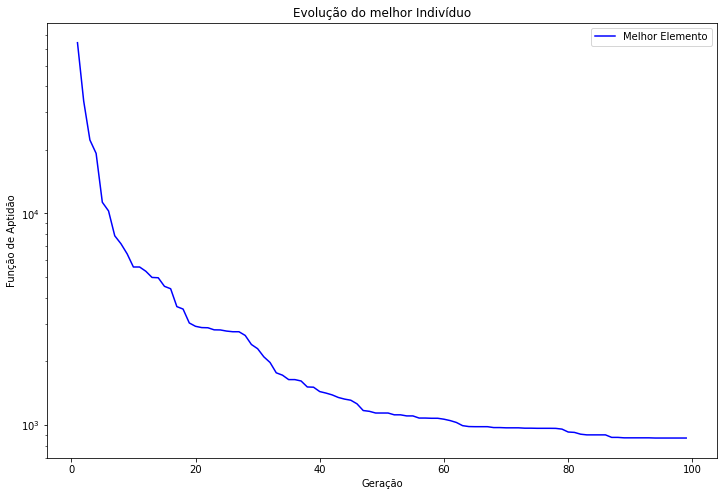

In [28]:
plt.figure(figsize=(6,4))

ax = plt.axes()

ax.plot(dsMenorMedia.g, dsMenorMedia.bestFit, color='blue', label='Melhor Elemento')

ax.set_xlabel('Geração', fontsize=14)
ax.set_ylabel('Função de Aptidão', fontsize=14)
#, title='Evolução do melhor Indivíduo')
plt.yscale('log')

plt.legend()

Agora irei realizar a mesma análise, mas voltada para o conjunto de parâmetros que levou ao melhor fit na última geração

In [9]:
datasetFinal.sort_values(by=['bestFit']).head(5)

,nger,npop,cp,mp,xmaxc,xmax_edge,g,worstFit,fit_avg,bestFit,desvPad
10835,150,20,0.8,0.01,2.0,110,149,2277.545765,1417.476028,724.708754,352.159826
7295,100,30,0.8,0.01,2.0,110,99,3665.822324,1634.643841,763.430908,613.529092
13535,150,30,1.0,0.01,2.0,110,149,9129.003922,1872.041647,766.234418,1587.902116
11735,150,20,1.0,0.01,2.0,110,149,4412.589781,1617.903595,767.267498,791.522976
12635,150,30,0.8,0.01,2.0,110,149,7802.504146,1990.871300,773.424913,1530.026515


Com essa métrica de análise, o melhor conjunto faz o uso de uma população com 30 elementos, 150 gerações, probabilidade de cruzamento de 80% e probabilidade de mutação de 1%. A única variação em relação ao conjunto analisado anteriormente é a taxa de cruzamento e o número de indivíduos da população

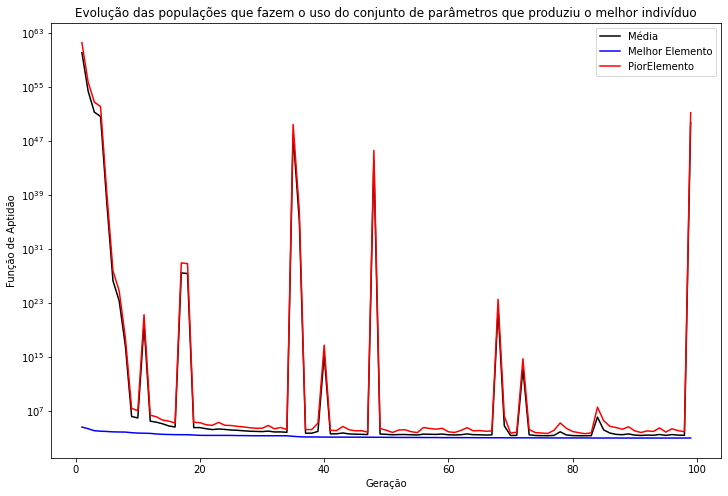

In [30]:
dsMenorElemento = datasetAgrupado.loc[(datasetAgrupado.nger == 100) & (datasetAgrupado.npop == 30) & (datasetAgrupado.cp == 0.8) & (datasetAgrupado.mp == 0.01) & (datasetAgrupado.xmax_edge == 100)]

plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorElemento.g, dsMenorElemento.fit_avg, color='black', label='Média')
ax.plot(dsMenorElemento.g, dsMenorElemento.bestFit, color='blue', label='Melhor Elemento')
ax.plot(dsMenorElemento.g, dsMenorElemento.worstFit, color='red', label='PiorElemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu o melhor indivíduo')
plt.yscale('log')

plt.legend()

Nessa população aconteceu o mesmo, queda com grandes oscilações. Também irei plotar apenas o melhor indivíduo

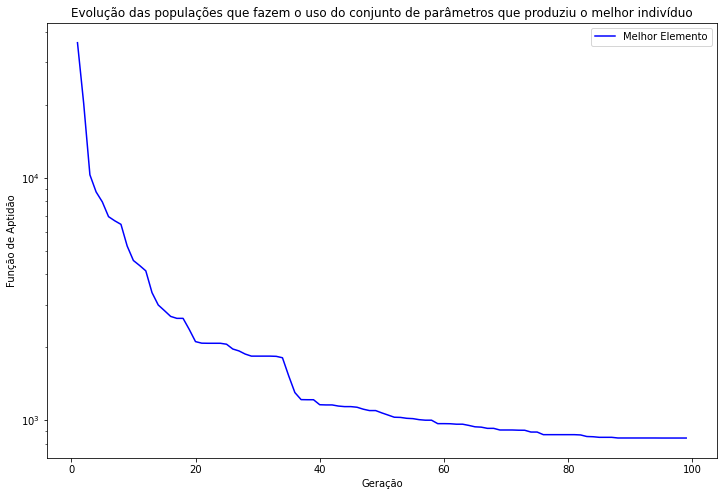

In [31]:
plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(dsMenorElemento.g, dsMenorElemento.bestFit, color='blue', label='Melhor Elemento')

ax.set(xlabel='Geração', ylabel='Função de Aptidão', title='Evolução das populações que fazem o uso do conjunto de parâmetros que produziu o melhor indivíduo')
plt.yscale('log')

plt.legend()

Em todas essas análises foi realizado a média das 10 execuções. Agora irei utilizar o dataset não agrupado para descobrir quais foram os parâmetros gerados e assim de fato realizar a previsão com esses parâmetros.

In [12]:
dataset.loc[(dataset.nger == dataset.g+1) & (dataset.nger == 150) & (dataset.npop == 30) & (dataset.cp == 0.8) & (dataset.mp == 0.01) & (dataset.xmax_edge == 100)]

,nger,npop,cp,mp,xmaxc,xmax_edge,exec,g,worstFit,fit_avg,bestFit,desvPad,c,weights
